# PyTorch Tutorial

This tutorial is mostly based on:

* https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
* https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [1]:
import numpy as np
import torch

print(torch.__version__)

2.1.0+cu121


## What is PyTorch?
PyTorch is a framework for working with deep neural networks.

## Why use PyTorch?
- Autograd functionality computes gradients automatically
- GPU acceleration allows for fast training and inference
- A large library of useful deep learning functions and modules already built in

## Overview
- `torch.Tensor` basic tensor operation
- `torch.Tensor.grad` auto-differentiation
- `torch.cuda` devices other than CPU
- `torch.nn` neural network blocks
- `torch.utils.data` dataset and dataloader

## PyTorch Tensors

PyTorch tensors are just like NumPy arrays, and they include many of the same operations you are used to from NumPy.

Construct a tensor of size $5 \times 3$ with random values:



In [2]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1044, 0.7647, 0.9963],
        [0.5831, 0.1827, 0.7652],
        [0.0354, 0.4160, 0.2312],
        [0.9624, 0.0391, 0.5137],
        [0.0427, 0.2981, 0.0222]])


Construct a matrix filled zeros and of dtype long:



In [3]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Make a tensor from a list of values:

In [4]:
x = torch.tensor([1, 2, 3])
print(x)
print(x.dtype)

x = torch.tensor([1., 2., 3.])
print(x)
print(x.dtype)

tensor([1, 2, 3])
torch.int64
tensor([1., 2., 3.])
torch.float32


Create a tensor based on another tensor (inherit size and dtype, unless otherwise specified):

By default, the returned Tensor of `new_ones` has the same torch.dtype and torch.device as input tensor.

In [5]:
x = x.new_ones(5, 3)  # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)  # override dtype!
print(x)                                    # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[-0.4482,  0.3086,  1.6238],
        [ 1.2088, -1.0765,  0.1671],
        [-0.6359,  1.4966,  0.3425],
        [-0.2728, -1.2677, -1.3757],
        [-0.5999, -0.5452, -0.6328]])


Get the size object of a tensor, an object which supports tuple operations:

In [6]:
print(x.size())
x.shape

torch.Size([5, 3])


torch.Size([5, 3])

Operations on tensors use similar syntax to NumPy:

In [7]:
x = torch.ones(5, 3)
y = torch.ones(5, 3)
print("x + y:", x + y)
print("torch.add(x, y):", torch.add(x, y))
print("y:", y)

x + y: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
torch.add(x, y): tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
y: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


PyTorch also supports in-place operations (method names end in '_'):

In [8]:
y.add_(x)
print(y)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


Example of broadcasting:

To learn more:
- https://numpy.org/doc/stable/user/basics.broadcasting.html
- https://pytorch.org/docs/stable/notes/broadcasting.html

In [9]:
import numpy as np
x = np.ones((5,3))
y = 1
print("x + y:", x + y)

x = torch.ones(5, 3)
y = 1
print("x + y:", x + y)

x = torch.ones(5, 3)
y = torch.ones(5, 1)
print("x + y:", x + y)

# failed case of conflicting dimension
# x = torch.ones(5, 3)
# y = torch.ones(3, 5)
# print("x + y:", x + y)



x + y: [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
x + y: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
x + y: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


Indexing works as you would expect:

In [10]:
x = torch.randn(5, 3)
print(x)
print(x[1:4, :])

tensor([[ 0.9489, -1.2397,  0.4025],
        [ 0.6337, -0.4374,  0.8640],
        [ 1.7867,  2.1365, -0.6910],
        [ 0.1850,  0.5888, -1.3322],
        [ 0.8561,  0.2448,  0.3562]])
tensor([[ 0.6337, -0.4374,  0.8640],
        [ 1.7867,  2.1365, -0.6910],
        [ 0.1850,  0.5888, -1.3322]])


In [11]:
# indexing by operators
x[x < 0] = 0
print(x)

tensor([[0.9489, 0.0000, 0.4025],
        [0.6337, 0.0000, 0.8640],
        [1.7867, 2.1365, 0.0000],
        [0.1850, 0.5888, 0.0000],
        [0.8561, 0.2448, 0.3562]])


You can change the order of the dimensions of a tensor with `torch.permute()`:

In [12]:
x = torch.randn(5, 3, 2)
print(x.shape)
print(x.permute(1,2,0).shape)

torch.Size([5, 3, 2])
torch.Size([3, 2, 5])


Tensor data types and casting:

In [13]:
a = torch.ones(3, 3, dtype=torch.double)
print(a)
b = a.long()
print(b.type())
c = a.int()
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
torch.LongTensor
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)


Documentation on various dtypes: https://pytorch.org/docs/stable/tensors.html

### More useful PyTorch Tensor operations

To see the complete API check here: https://pytorch.org/docs/stable/tensors.html

`.view()` can be used to resize/reshape tensors:


In [14]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use `.item()` to get the value as a Python number:


In [15]:
x = torch.ones(4,5)
x = x.sum()
print(x)
print(x.item())

tensor(20.)
20.0


Concatenating two matrices together

In [16]:
x = torch.ones(5, 3)
y = torch.zeros(5, 2)
print(torch.cat([x, y], dim=1))
# wrong:
# print(torch.cat([x, y], dim=0))


tensor([[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.]])


### Converting between NumPy arrays and PyTorch Tensors

Important: PyTorch Tensors and NumPy arrays will share the same underlying memory locations. If you change values for one, the values for the other will be changed too.

Convert PyTorch Tensor to NumPy array:

such conversion requires source tensor to be on CPU.

In [17]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


Convert NumPy array to PyTorch Tensor:

In [18]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors (On GPU)

PyTorch tensors have the added benefit that they can easily be placed on a GPU to speed up computations.

Query information about the GPU (if CUDA is available):

In [19]:
if torch.cuda.is_available():
    !nvidia-smi

Thu Feb 29 09:34:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

You can use `torch.device` objects to move tensors to and from the GPU:

In [20]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings `.to("cuda")`
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # `.to` can also change dtype

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], dtype=torch.float64)


Default device can be specified by [`torch.cuda.set_device(device)`](https://pytorch.org/docs/stable/generated/torch.cuda.set_device.html)


## Autograd: Automatic Differentiation

From: https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

Now that you have learned how to use PyTorch Tensors you will learn how we can use PyTorch for automatic differentiation.

The `autograd` package in PyTorch provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

To allow PyTorch to keep track of operations for automatic differentiation, we need to set `requires_grad` as `True` for a Tensor. Autograd will then start to track all operations on the Tensor. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into the `.grad` attribute.

To stop a tensor from tracking history, you can call `.detach()` to detach
it from the computation history, and to prevent future computation from being
tracked.

To prevent tracking history (and using memory), you can also wrap the code block in `with torch.no_grad():`. This can be particularly helpful when evaluating a model because the model may have trainable parameters with `requires_grad=True`, but for which we don't need the gradients.

There’s one more class which is very important for autograd implementation - a `Function`.

`Tensor` and `Function` are interconnected and build up an acyclic
graph that encodes a complete history of computation. Each tensor has
a `.grad_fn` attribute that references a `Function` that has created
the `Tensor` (except for Tensors created by the user - their `grad_fn` is `None`).

If you want to compute the derivatives, you can call `.backward()` on a `Tensor`. If `Tensor` is a scalar (i.e. it holds a one element data), you don’t need to specify any arguments to `backward()`, however if it has more elements, you need to specify a `gradient` argument that is a tensor of matching shape.

Create a tensor and set `requires_grad=True` to track computation with it:

In [21]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Perform a tensor operation:

In [22]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


`y` was created as a result of an operation, so it has a `grad_fn`:

In [23]:
print(y.grad_fn)

Do more operations on `y`:

In [24]:
z = y * y * 3
print(z)
out = z.mean()
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


`.requires_grad_()` changes an existing Tensor's `requires_grad` flag in-place. The input flag defaults to `False` if not given:




In [25]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


### Gradients

Let's backprop now. Because `out` contains a single scalar, `out.backward()` is equivalent to `out.backward(torch.tensor(1))`:



In [26]:
out.backward()

Print gradients $\frac{d(\texttt{out})}{d\texttt{x}}$:

In [27]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should get a matrix of `4.5`. Let's call the `out` *Tensor* "$o$". We find that $o = \frac{1}{4}\sum_i z_i$, $z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$. Therefore, $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.

You can do many crazy things with autograd!



In [28]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-504.4586, -214.1311, 1178.4143], grad_fn=<MulBackward0>)


In [29]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


You can also stop autograd from tracking history on Tensors with `.requires_grad=True` by wrapping the code block in `with torch.no_grad()`:

In [30]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

True
True
False


The `.detach()` method is used when we want to perform operations on tensors without affecting the gradient computation of the original tensor.

In [31]:
x = torch.randn(3, requires_grad=True)
print(x.requires_grad)

y = x.detach()
print(y.requires_grad)

z = y * 2
print(z.requires_grad)

True
False
False


**Read Later:**

Documentation of `torch.autograd` and `Function` is at
http://pytorch.org/docs/autograd

## Neural Networks

The `torch.nn` package in PyTorch provides higher level building blocks for neural networks like fully connected or convolutional layers. The `nn` package makes use of the `autograd` functionality to define these model building blocks and differentiate them. This allows us to quickly and easily implement neural networks by putting together layers and using PyTorch to help us update learnable parameters with the gradient.

An `nn.Module` contains layers, and a method `forward(input)` that
returns the `output`.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:
  `weight = weight - learning_rate * gradient`

### Define the network

In the cell below we define a simple convolutional neural network. Notice that we use the `nn.Conv2d` and `nn.Linear` Modules as building blocks for the network.

There are plenty of other types of layers and tools available in the [torch.nn](https://pytorch.org/docs/stable/nn.html) package such as pooling layers, dropout, and batchnorm.

Conveniently, PyTorch is completely open source so you can check out exactly how each of these Modules are implemented:

* https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py
* https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/conv.py

**Important:** Whenever you extend the `nn.Module` class (e.g. with the `Net` class below) you will need to call the superclass constructor or an error will be thrown. In this example below this line is: `super().__init__()`

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super().__init__()
        # 1 input image channel, 6 output channels, 5x5 convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the ``forward`` function, and the ``backward``
function (where gradients are computed) is automatically defined for you
using ``autograd``.
You can use any of the Tensor operations in the ``forward`` function.

The learnable parameters of a model are returned by ``net.parameters()``



In [33]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


Continuing, let's try a random 32x32 input

In [34]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

# wrong:
# net.forward(input)

tensor([[-0.0695, -0.0625, -0.0413,  0.1070,  0.0370, -0.0856,  0.0663,  0.1154,
         -0.0844, -0.0402]], grad_fn=<AddmmBackward0>)


- Zero the gradient buffers of all parameters
- To calculate the gradient of all the parameters that used to compute `out` w.r.t. some random value



In [35]:
net.zero_grad()  # important, since gradient is accumulated
out.backward(torch.randn(1, 10))

In [36]:
# to check gradient buffer:
# net.conv1.bias.grad.shape

The [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) module can sometimes be helpful to define blocks succintly or avoid creating a new `nn.Module` class for a small network. The `.forward()` function will be automatically defined by running modules in the order they are passed in to `nn.Sequential`.

For example, you can define a block of convolutional layers below:

In [37]:
conv_layers = nn.Sequential(
                nn.Conv2d(1, 6, 5),
                nn.ReLU(),
                nn.Conv2d(6, 16, 5),
                nn.ReLU()
            )

**Note:**

`torch.nn` only supports mini-batches. The entire `torch.nn` package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Width`.

If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

Before proceeding further, let's recap all the classes you’ve seen so far.

**Recap:**
- `torch.Tensor` - A *multi-dimensional array* with support for autograd operations like `backward()`. Also *holds the gradient* w.r.t. the tensor.
- `nn.Module` - Neural network module. *Convenient way of encapsulating parameters*, with helpers for moving them to GPU, exporting, loading, etc.
- `nn.Parameter` - A kind of Tensor, that is *automatically registered as a parameter when assigned as an attribute to a* `Module`.
- `autograd.Function` - Implements *forward and backward definitions of an autograd operation*. Every `Tensor` operation, creates at least a single `Function` node, that connects to functions that created a `Tensor` and *encodes its history*.

**At this point, we covered:**
- Defining a neural network
- Processing inputs and calling backward

**Still Left:**
- Computing the loss
- Updating the weights of the network

### Loss Function

A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions) under the `nn` package. A simple loss is `nn.MSELoss`, which computes the mean-squared error between the input and the target.

For example:

In [38]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(2.0173, grad_fn=<MseLossBackward0>)


Now, if you follow `loss` in the backward direction, using its `.grad_fn` attribute, you will see a graph of computations that looks like this:

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

So, when we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Tensors in the graph that have `requires_grad=True` will have their `.grad` Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:

In [39]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[1][0])  # ReLU

### Backprop

To backpropagate the error all we have to do is call `loss.backward()`. You need to clear the existing gradients though, otherwise the gradients will be accumulated to existing gradients.

Now we'll call `loss.backward()`, and have a look at conv1's bias
gradients before and after the backward step.

In [40]:
net.zero_grad()  # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0181,  0.0098,  0.0090, -0.0002, -0.0039,  0.0034])


Now, we have seen how to use loss functions.

**The only thing left to learn is:**

- Updating the weights of the network

### Update the weights

The simplest update rule used in practice is the Stochastic Gradient
Descent (SGD):

     weight = weight - learning_rate * gradient

We can implement this using simple python code:

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
```

However, as you use neural networks, you'll want to use various different
update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc.
To enable this, PyTorch has a small package: `torch.optim` that
implements all these methods. Using it is very simple:

In [41]:
import torch.optim as optim

# Create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# In your training loop:
optimizer.zero_grad()             # zero the gradient buffers
output = net(input)               # compute the forward pass
loss = criterion(output, target)  # compute the loss
loss.backward()                   # compute the gradients
optimizer.step()                  # update the parameters

print(loss)

tensor(2.0173, grad_fn=<MseLossBackward0>)


**Important:** Note how gradient buffers had to be manually set to zero using `optimizer.zero_grad()`. This is because gradients are accumulated, so if you don't zero gradients before each `backward()` call, you will begin accumulating gradients from previous forward/backward passes.

#### Note on eval and train modes

**Important**: If you use layers in your network like `torch.nn.Dropout` or `torch.nn.BatchNorm2d` which have different behavior during training and evaluation, you will need to make sure the modules in your network are appropriately set. PyTorch makes this easy with `eval` and `train` methods for any network extending `nn.Module`. Before beginning training you will call `net.train()` to set all modules in the network to train mode, and equivalently before evaluating you should call `net.eval()`.

## Training a Classifier

Now that you have seen the basics of how to define neural networks, compute losses, and make training updates, you will see how a simple classifier is trained in PyTorch on CIFAR-10.

### What about data?

Generally, when you have to deal with image, text, audio, or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a `torch.*Tensor`.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
`torchvision`, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc., models for common architectures, and data transformers for images.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: 'airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck'. The images in CIFAR-10 are of
size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size.

### Training an image classifier

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1) Loading and normalizing CIFAR10

Using `torchvision`, it’s extremely easy to load CIFAR10.



In [42]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are `PIL` images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1] using the `transforms.ToTensor` and `transforms.Normalize` functions.

The [transforms package](https://pytorch.org/vision/stable/transforms.html) has other functions that you might use for **data augmentation**. For example, `torchvision.transforms.RandomResizedCrop` and `torchvision.transforms.RandomHorizontalFlip`.

In [43]:
# Transforms
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Datasets
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=train_transform)
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=test_transform)

# Data loaders
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 79766814.73it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



horse        dog      horse        car


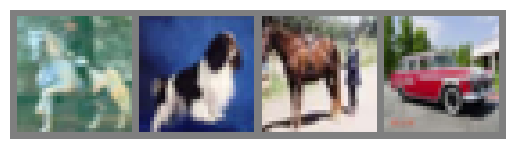

In [44]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    """Function to display an image."""
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')


# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)


# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print('      '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Training on GPU

Just like how you transfer a Tensor on to the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda


If `device` is in fact set to a CUDA device, then these methods will recursively go over all modules and convert their parameters and buffers to CUDA tensors:

```python
net = net.to(device)
```

Remember that you will have to send the inputs and targets at every step
to the GPU too:

```python
inputs, labels = inputs.to(device), labels.to(device)
```

Why don't I notice MASSIVE speedup compared to CPU? Because your network
is *realllly* small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first `nn.Conv2d`, and argument 1 of the second `nn.Conv2d` –
they need to be the same number), see what kind of speedup you get.

### 2) Define a Convolution Neural Network

Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [46]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.out_channels1 = 6
        self.out_channels2 = 16
        self.conv1 = nn.Conv2d(3, self.out_channels1, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(self.out_channels1, self.out_channels2, 5)
        self.fc1 = nn.Linear(self.out_channels2 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

### 3) Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [47]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.001)

### 4) Train the network


This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [48]:
import time


net = net.train()

# Loop over the dataset for multiple epochs
for epoch in range(1, 3):
    running_loss = 0.0
    t_s = time.time()

    # For each mini-batch...
    for i, data in enumerate(trainloader, 1):
        # Get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 0:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch, i, running_loss / 2000))
            running_loss = 0.0
            print('iters time:', time.time() - t_s)
            t_s = time.time()

print('Finished Training')

[1,  2000] loss: 2.268
iters time: 10.238492727279663
[1,  4000] loss: 1.924
iters time: 8.014987707138062
[1,  6000] loss: 1.717
iters time: 8.550036430358887
[1,  8000] loss: 1.615
iters time: 8.520316362380981
[1, 10000] loss: 1.555
iters time: 7.950575351715088
[1, 12000] loss: 1.477
iters time: 8.616783618927002
[2,  2000] loss: 1.408
iters time: 8.718575239181519
[2,  4000] loss: 1.407
iters time: 8.561864376068115
[2,  6000] loss: 1.365
iters time: 7.98084568977356
[2,  8000] loss: 1.315
iters time: 8.633338928222656
[2, 10000] loss: 1.311
iters time: 9.71742033958435
[2, 12000] loss: 1.296
iters time: 8.47375226020813
Finished Training


Let’s quickly save our trained model:

In [49]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

We can load back in a saved model with the following: (note: saving and re-loading the model wasn’t necessary here, we only did it to illustrate how to do so):

In [50]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### 5) Test the network on the test data

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learned anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

Ground truth:
  cat       ship       ship      plane


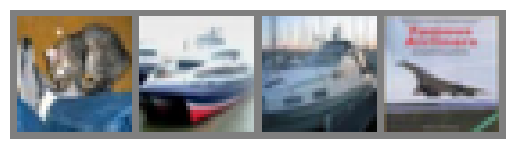

In [51]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('Ground truth:')
print('      '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [52]:
net = net.eval()

outputs = net(images.to(device))

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



Predicted:
  cat        car      plane      plane


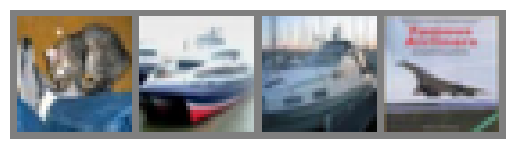

In [53]:
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
print('Predicted:')
print('      '.join('%5s' % classes[predicted[j]] for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [54]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d%%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55%


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learned something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:

In [55]:
class_correct = [0] * 10
class_total = [0] * 10
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s: %2d%%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane: 65%
Accuracy of   car: 74%
Accuracy of  bird: 39%
Accuracy of   cat: 29%
Accuracy of  deer: 52%
Accuracy of   dog: 64%
Accuracy of  frog: 67%
Accuracy of horse: 52%
Accuracy of  ship: 48%
Accuracy of truck: 64%


### Other information

How to write data loading code in PyTorch: https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

More details on saving and loading models: https://pytorch.org/tutorials/beginner/saving_loading_models.html

## Other Tips and Helpful Functions


### Tips for debugging

Checklist for common PyTorch mistakes:

* Did you set `shuffle=True` in your train dataloader?
* Did you properly set `net.train()` and `net.eval()` in your training and evaluation code?
* Did you call `zero_grad()` in your training loop before `.backward()` to prevent gradients from accumulating?

Other tips:
* Have you visualized your loaded images? This is the best way to catch data loader issues.
* If you are getting a CUDA out of memory error, first try decreasing the batch size. If you are still getting the same error, your network may simply be too large, or you could be accidentally allocating a large array in memory.
* If the GPU memory is full, first try clearing the outputs and restarting the kernel. If that does not work, manually clear the GPU memory using `torch.cuda.empty_cache()`.
* Getting CUDA errors that are hard to understand? Sometimes error messages will be simpler if you switch your network to cpu memory to debug the forward and backward passes.



### Pretrained models

PyTorch provides easy access to load many pretrained models. You can find a wide variety of vision models pretrained for different tasks in the `torchvision` package: https://pytorch.org/vision/stable/models.html

To load a ResNet50 model pretrained on ImageNet:

In [56]:
from torchvision.models import resnet50, ResNet50_Weights

weights = ResNet50_Weights.IMAGENET1K_V1
resnet = resnet50(weights=weights)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 156MB/s]


It's common that you may want to finetune some or all of the weights in a pretrained model. You can check here for more details on how to do this: https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html


There are even more pretrained models available on the PyTorch Hub: https://pytorch.org/hub/

### More Tensor operations

The `torch.einsum` function offers a compact way to express various matrix transformations and products. Many of common matrix and vector computations can be easily expressed elegantly with a call to this function.

Some simple examples are below, but you can find many more example einsum operations in this helpful blog post: https://rockt.github.io/2018/04/30/einsum


In [57]:
x = torch.arange(6).reshape(2, 3)
print('x: ', x)

# matrix transpose
out = torch.einsum('ij->ji', [x])
print(out)

# sum all the rows in a matrix
out = torch.einsum('ij->i', [x])
print(out)

# sum all the values in a matrix
out = torch.einsum('ij->', [x])
print(out)

x:  tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])
tensor([ 3, 12])
tensor(15)


Operations on two matrices:

In [58]:
x = torch.arange(9).reshape(3, 3)
y = torch.arange(9).reshape(3, 3)
print('x: ', x)
print('y: ', y)

# element-wise multiplication
out = torch.einsum('ij,ij->ij', [x, y])
print(out)

# matrix multiplication
out = torch.einsum('ik,kj->ij', [x, y])
print(out)

x:  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
y:  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[ 0,  1,  4],
        [ 9, 16, 25],
        [36, 49, 64]])
tensor([[ 15,  18,  21],
        [ 42,  54,  66],
        [ 69,  90, 111]])
